In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')

%config InlineBackend.figure_format = 'retina'

%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

### Q1. 전국 시도별 약국수 구하기

In [4]:
# "상권업종소분류명"이 "약국"인 데이터만 df_drug에 저장
df_drug = df[df["상권업종소분류명"] == "약국"]
# df_drug의 데이터를 "시도명"으로 그룹화해 개수 세기
df_drug["시도명"].value_counts()

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

### Q2. 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석하기

In [6]:
# "상권업종소분류명"이 "동물병원"인 데이터를 df_vet에 저장
df_vet = df[df["상권업종소분류명"] == "동물병원"]
# df_vet의 데이터를 "시도명"으로 그룹화해 개수 세기
df_vet["시도명"].value_counts()

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64

<Axes: ylabel='시도명'>

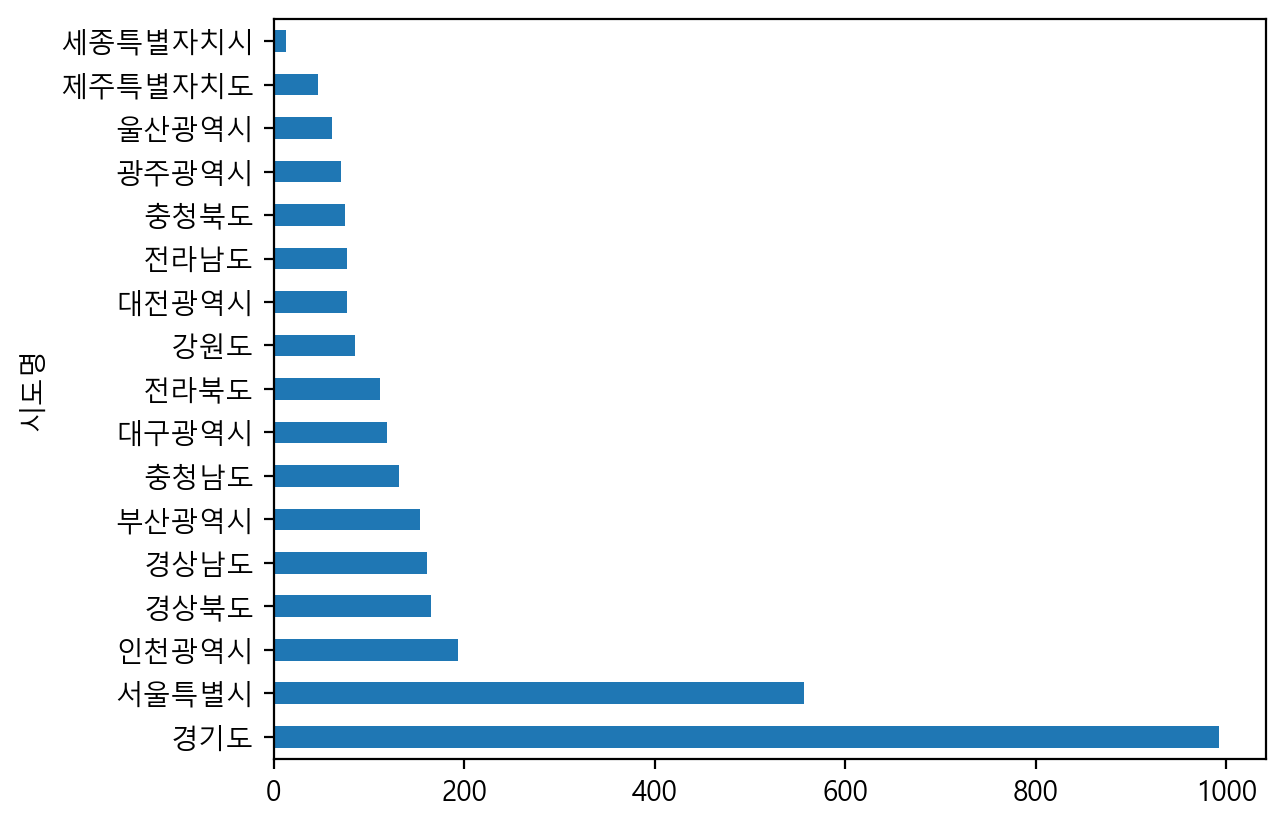

In [25]:
# 위에서 구한 결과를 막대그래프로 표현
df_vet["시도명"].value_counts().plot.barh()

### Q3. 서울시의 피부과/성형외과가 전체 병원 수 중에서 차지하고 있는 비율 구하기

In [28]:
# data 폴더의 "상가(상권)정보_의료기관_201909.csv" 파일을 불러와 df2에 저장
df2 = pd.read_csv("data/상가(상권)정보_의료기관_201909.csv", low_memory=False)

# "상권업종중분류명"이 "병원"이고, 동시에 "시도명"이 "서울특별시"인 데이터를 df_seoul_hospital에 저장
df_seoul_hospital = df2[
    (df2["상권업종중분류명"] == "병원") &
    (df2["시도명"]== "서울특별시")]

# df_seoul_hospital의 데이터 중 "상권업종소분류명"에 "피부" 또는 "성형"이 포함된 데이터를 df_part에 저장
df_part = df_seoul_hospital[df_seoul_hospital["상권업종소분류명"].str.contains("피부|성형")]

# df_part, df_seoul_hospital 각각의 데이터를 "시군구명"으로 그룹화해 나온 데이터 개수를 나눠 비율을 구함
# 그 결과를 round(2)를 이용해 소수점 둘째자리까지 반올림해 df_ratio에 저장
df_ratio = (df_part["시군구명"].value_counts() / df_seoul_hospital["시군구명"].value_counts()).round(2)
# df_ratio의 데이터를 내림차순으로 정리해 출력
df_ratio.sort_values(ascending=False)

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64

### Q4. folium 을 통해 지도에 전국의 '노인/치매병원'을 표시하기

In [31]:
import folium
# "상권업종소분류명"이 "노인/치매병원"인 데아터를 df_old에 저장
df_old = df[df["상권업종소분류명"] == "노인/치매병원"]
# geo_old에 df_old를 복사해 저장
geo_old = df_old.copy()

# folium.map을 이용해 지도의 중심을 geo_old의 "위도"와 "경도"의 평균으로 지정
fmap = folium.Map(location=[geo_old["위도"].mean(), geo_old["경도"].mean()],
                 zoom_start=7)

# for문을 이용해 geo_old의 index값을 하나씩 가져옴
for n in geo_old.index:
    # "상호명-도로명주소"의 형태로 출력되도록 popup_name에 저장
    popup_name = geo_old.loc[n, "상호명"] + " - " + geo_old.loc[n, "도로명주소"]

    folium.Marker(
        # geo_old의 위도와 경도를 location에 할당해 위치 설정
        location=[geo_old.loc[n,"위도"], geo_old.loc[n, "경도"]],
        # popup과 tooltip에 popup_name이 뜨도록 각각 할당
        popup=popup_name,
        tooltip=popup_name,
        # 지도에 표시되는 icon을 초록색과 + 모양으로 지정
        icon=folium.Icon(color="green", icon="plus")
    ).add_to(fmap)


fmap